# Исследование данных сервиса аренды самокатов

# Описание проекта:
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
 
- без подписки:
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
 
- с подпиской Ultra:
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.
 
# Цель проекта:
Проанализировать данные о пользователях и поездках сервиса аренды самокатов, чтобы проверить гипотезы, которые помогут увеличить прибыль и улучшить бизнес-модель. В частности, исследовать поведение пользователей с подпиской и без неё, чтобы определить, как подписка влияет на частоту и стоимость поездок, и предложить меры для привлечения большего числа пользователей к подписке.
 
# План работы:
1. Открыть файл с данными и изучить общую информацию.
2. Провести предобработку данных.
3. Провести анализ следующих параметров:
   - частота встречаемости городов;
   - соотношение пользователей с подпиской и без подписки;
   - возраст пользователей;
   - расстояние, которое пользователь преодолел за одну поездку;
   - продолжительность поездок.
4. Объединить данные в один датафрейм.
5. Создать отдельные датафреймы по виду подписки и изучить информацию о расстоянии и времени поездок для пользователей обеих категорий.
6. Подсчитать выручку.
7. Проверить гипотезы:
   - тратят ли пользователи с подпиской больше времени на поездки?
   - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает ли 3130 метров? 
   - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
   - снизилось ли количество обращений в техподдержку после того, как техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение?
8. Распределения:
   - определение минимального количества рассылаемых промокодов;
   - рассылка клиентам push-уведомлений в мобильном приложении.
 
  
# Описание данных:

В основных данных есть информация о пользователях, их поездках и подписках.
 
  
**Пользователи — `users_go.csv`:**
- `'user_id'` — уникальный идентификатор пользователя
- `'name'`  имя пользователя
- `'age'` — возраст
- `'city'` — город
- `'subscription_type'` — тип подписки (free, ultra)

 
**Поездки — `rides_go.csv`:**
- `'user_id'` — уникальный идентификатор пользователя
- `'distance'` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `'duration'` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `'date'` — дата совершения поездки

 
**Подписки — `subscriptions_go.csv`:**
- `'subscription_type'` — тип подписки
- `'minute_price'` — стоимость одной минуты поездки по данной подписке
- `'start_ride_price'` — стоимость начала поездки
- `'subscription_fee'` — стоимость ежемесячного платежа

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных-файла-в-датафрейм" data-toc-modified-id="Загрузка-данных-файла-в-датафрейм-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных файла в датафрейм</a></span></li><li><span><a href="#Изучение-общей-информации-о-датафреймах" data-toc-modified-id="Изучение-общей-информации-о-датафреймах-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации о датафреймах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Устранение дубликатов</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li></ul></li><li><span><a href="#Добавление-столбца-'month'" data-toc-modified-id="Добавление-столбца-'month'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление столбца <code>'month'</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-столбца-'city'" data-toc-modified-id="Анализ-столбца-'city'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ столбца <code>'city'</code></a></span></li><li><span><a href="#Анализ-столбца-'subscription_type'" data-toc-modified-id="Анализ-столбца-'subscription_type'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ столбца <code>'subscription_type'</code></a></span></li><li><span><a href="#Анализ-столбца-'age'" data-toc-modified-id="Анализ-столбца-'age'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ столбца <code>'age'</code></a></span></li><li><span><a href="#Анализ-столбца-'distance'" data-toc-modified-id="Анализ-столбца-'distance'-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ столбца <code>'distance'</code></a></span></li><li><span><a href="#Анализ-столбца-'duration'" data-toc-modified-id="Анализ-столбца-'duration'-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ столбца <code>'duration'</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-всех-данных-в-один-датафрейм" data-toc-modified-id="Объединение-всех-данных-в-один-датафрейм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объединение всех данных в один датафрейм</a></span></li><li><span><a href="#Создание-отдельных-датафреймов-по-виду-подписки" data-toc-modified-id="Создание-отдельных-датафреймов-по-виду-подписки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создание отдельных датафреймов по виду подписки</a></span></li><li><span><a href="#Визуализация-поездок-по-типу-подписки" data-toc-modified-id="Визуализация-поездок-по-типу-подписки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация поездок по типу подписки</a></span><ul class="toc-item"><li><span><a href="#Сравнение-расстояния-поездок-по-типу-подписки" data-toc-modified-id="Сравнение-расстояния-поездок-по-типу-подписки-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Сравнение расстояния поездок по типу подписки</a></span></li><li><span><a href="#Сравнение-времени-поездок-по-типу-подписки" data-toc-modified-id="Сравнение-времени-поездок-по-типу-подписки-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Сравнение времени поездок по типу подписки</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подсчёт-выручки" data-toc-modified-id="Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Создание-датафрейма-с-агрегированными-данными-о-поездках" data-toc-modified-id="Создание-датафрейма-с-агрегированными-данными-о-поездках-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создание датафрейма с агрегированными данными о поездках</a></span></li><li><span><a href="#Подсчёт-помесячной-выручки-за-каждого-пользователя" data-toc-modified-id="Подсчёт-помесячной-выручки-за-каждого-пользователя-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подсчёт помесячной выручки за каждого пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Время,-потраченное-на-поездки-пользователями-с-подпиской-Ultra" data-toc-modified-id="Время,-потраченное-на-поездки-пользователями-с-подпиской-Ultra-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Время, потраченное на поездки пользователями с подпиской Ultra</a></span></li><li><span><a href="#Среднее-расстояние,-пройденное-за-одну-поездку-пользователями-с-подпиской-Ultra" data-toc-modified-id="Среднее-расстояние,-пройденное-за-одну-поездку-пользователями-с-подпиской-Ultra-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Среднее расстояние, пройденное за одну поездку пользователями с подпиской Ultra</a></span></li><li><span><a href="#Помесячная-выручка-по-месяцам-от-пользователей-по-типу-подписки" data-toc-modified-id="Помесячная-выручка-по-месяцам-от-пользователей-по-типу-подписки-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Помесячная выручка по месяцам от пользователей по типу подписки</a></span></li><li><span><a href="#Тест-для-проверки-гипотезы-о-снижении-количества-обращений-в-техподдержку-после-обновления-сервера" data-toc-modified-id="Тест-для-проверки-гипотезы-о-снижении-количества-обращений-в-техподдержку-после-обновления-сервера-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Тест для проверки гипотезы о снижении количества обращений в техподдержку после обновления сервера</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span><ul class="toc-item"><li><span><a href="#Определение-минимального-количества-рассылаемых-промокодов" data-toc-modified-id="Определение-минимального-количества-рассылаемых-промокодов-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Определение минимального количества рассылаемых промокодов</a></span></li><li><span><a href="#Рассылка-клиентам-push-уведомлений-в-мобильном-приложении" data-toc-modified-id="Рассылка-клиентам-push-уведомлений-в-мобильном-приложении-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Рассылка клиентам push-уведомлений в мобильном приложении</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

### Импорт библиотек

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
from scipy.stats import binom, norm

Создадим функции, которые нам потребуются в работе.

In [2]:
# Функция для изучения общей информации данных и 
# характеристикк числовых признаков
def data_research(dataset):
    display(dataset.head())
    print()
    print('Общая информация о данных:\n')
    print(dataset.info(), '\n\n')
    print('Описание данных:\n')
    print(dataset.describe())

### Загрузка данных файла в датафрейм

Загружаем данные из csv-файлов в датафрейм.

In [3]:
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv', 
                         parse_dates=['date'], 
                         dayfirst=True)
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

Проверим 5 первых строк каждого датафрейма.

**Данные о пользователях `users_data`:**

In [4]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Данные о поездках `rides_data`:**

In [5]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Данные о подписках `subscriptions_data`:**

In [6]:
subscriptions_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Изучение общей информации о датафреймах

Изучим общую информацию и характеристики числовых данных в датафреймах при помощи функции `'data_research'`.

**Данные о пользователях `users_data`:**

In [7]:
data_research(users_data)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None 


Описание данных:

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


**Данные о поездках `rides_data`:**

In [8]:
data_research(rides_data)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None 


Описание данных:

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


In [9]:
rides_data['date'].describe()

/tmp/ipykernel_133/4019468176.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rides_data['date'].describe()


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

**Данные о подписках `subscriptions_data`:**

In [10]:
data_research(subscriptions_data)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None 


Описание данных:

       minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0.000000
25%        6.500000         12.500000         49.750000
50%        7.000000         25.000000         99.500000
75%        7.500000         37.500000        149.250000
max        8.000000         50.000000        199.000000


Построим предварительные графики по числовым данным.

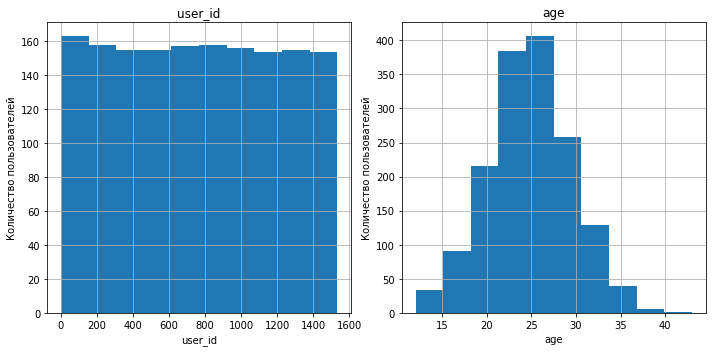

In [11]:
axes = users_data.hist(figsize=(10, 5))

# Добавляем подписи осей
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Количество пользователей')

plt.tight_layout()
plt.show()

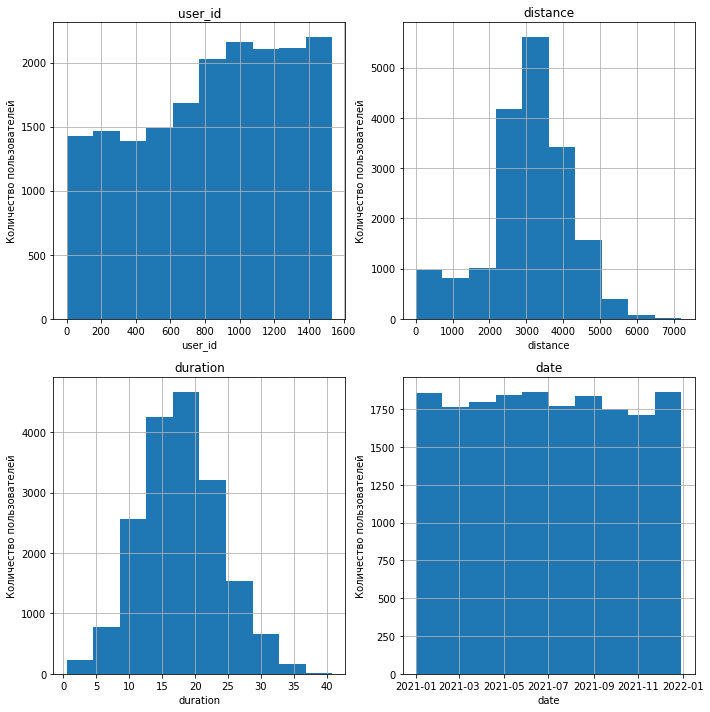

In [12]:
axes = rides_data.hist(figsize=(10, 10))

# Добавляем подписи осей
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Количество пользователей')

plt.tight_layout()
plt.show()

### Вывод

В таблицах нет пропущенных значений, которые бы требовалось обработать. Наименования столбцов написаны корректно.

Можно увидеть, что данные представлены за период с 01.01.2021 по 30.12.2021.

В столбцах `'distance'` и `'duration'` датафрейма `rides_data` присутствуют аномально малые значения, которые необходимо изучить подробнее.

## Предобработка данных

Сначала необходимо проверить датафреймы на наличие дубликатов.

После этого добавим новый столбец в датафрейм `rides_data` с номером месяца на основе столбца `'date'`.

### Устранение дубликатов

#### Явные дубликаты

Сперва проверим, нет ли в таблице явных дубликатов.

In [13]:
users_data.duplicated().sum()

31

In [14]:
rides_data.duplicated().sum()

0

В датафрейме `users_data` обнаружены 31 дубликат. Взглянем на них.

In [15]:
users_data[users_data.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Удалим явные дубликаты и обновим индексы.

In [16]:
users_data = users_data.drop_duplicates().reset_index(drop=True)

Проверяем результат.

In [17]:
users_data.duplicated().sum()

0

In [18]:
users_data.tail()

,user_id,name,age,city,subscription_type
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free
1533,1534,Альберт,25,Краснодар,free


Мы избавились от 31 явного дубликата, индексы отображаются корректно. 

#### Неявные дубликаты

Проверим столбцы `'city'` и `'subscription_type'` из датафрейма `users_data` на наличие неявнях дубликатов.

In [19]:
print(len(users_data['city'].unique()))
sorted(users_data['city'].unique())

8


['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

In [20]:
print(len(users_data['subscription_type'].unique()))
sorted(users_data['subscription_type'].unique())

2


['free', 'ultra']

Неявных дубликатов в таблице нет, поэтому двигаемся дальше.

### Добавление столбца `'month'`

Добавим столбец  `'month'` в датафрейм `rides_data`, в котором будет указан номер месяца поездки.

In [21]:
rides_data['month'] = rides_data['date'].dt.month

Проверяем результат.

In [22]:
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


В конце таблицы мы видим, что новый столбец отображается, и информация в нем корректна.

### Вывод

Мы избавились от 31 явного дубликата в датафрейме `users_data`.

Также был добавлен столбец  `'month'` в датафрейм `rides_data`, в котором указан номер месяца поездки.

## Исследовательский анализ данных

### Анализ столбца `'city'`

Изучим данные столбца из датафрейма `users_data`.

In [23]:
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

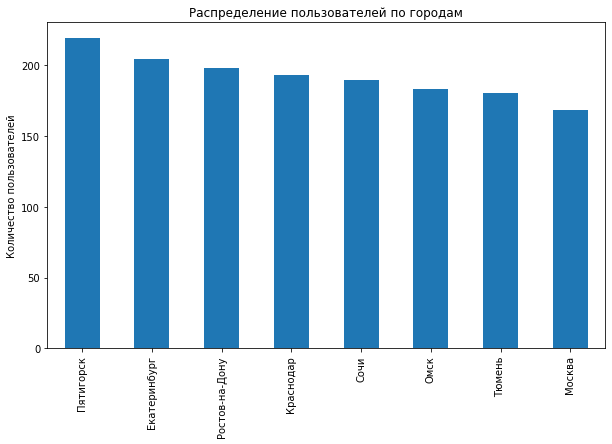

In [24]:
users_data['city'].value_counts().plot(
    kind='bar', 
    figsize=(10,6), 
    title='Распределение пользователей по городам',
    ylabel='Количество пользователей'
);

В данных представлено 8 городов. Наибольшее количество пользователей обнаружено в Пятигорске - 219 пользователей (14.3%), что на 25% больше, чем в Москве, где обнаружено наименьшее число пользователей - 168 (11%). Это вызывает вопросы, поскольку Москва является крупным городом с большим количеством потенциальных пользователей. 

Возможные причины этого могут быть более высокая конкуренция в Москве, меньшая развитость инфраструктуры для передвижения на самокатах. 

Также возможно, что у нас недостаточно данных для Москвы или данные были неправильно собраны или записаны. Это может привести к искажению результатов. Или в данных могут быть выбросы, которые искажают общую картину. Например, несколько пользователей в Пятигорске, которые очень часто используют самокаты, могут создать иллюзию, что в этом городе самокаты используются чаще.

### Анализ столбца `'subscription_type'`

Изучим данные столбца из датафрейма `users_data`.

In [25]:
users_data['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

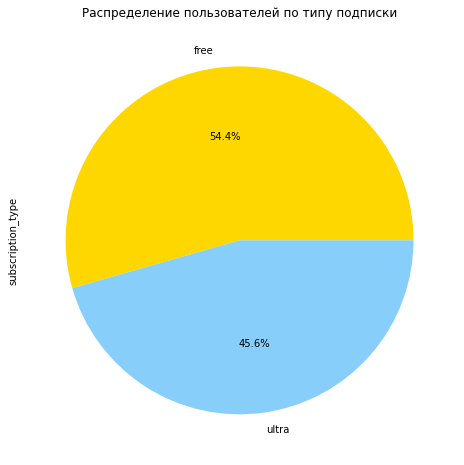

In [26]:
users_data['subscription_type']\
    .value_counts()\
    .plot(kind='pie', 
          figsize=(8,8), 
          autopct='%1.1f%%',
          colors=['gold', 'lightskyblue'],
          title = 'Распределение пользователей по типу подписки');

Приложением без подписки пользуется 835 пользователей, что составляет 54.4% от всех пользователей, а с подпиской Ultra пользуется 699 пользователей, что составляет 45.6% соответственно.

Пользователей приложения без подписки больше всего лишь на 8.8%, чем пользователей с подпиской Ultra.

### Анализ столбца `'age'`

Изучим данные столбца из датафрейма `users_data`.

In [27]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

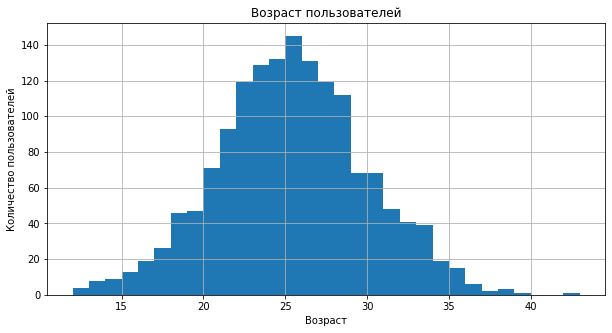

In [28]:
users_data.hist(column='age', bins=31, figsize=(10, 5));
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Распределение возраста пользователей выглядит равномерным. Половина пользователей имеет возраст от 22 до 28 лет. Самому младшему пользователю 12 лет, самому старшему - 43 года.

### Анализ столбца `'distance'`

Изучим данные столбца из датафрейма `rides_data`.

In [29]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

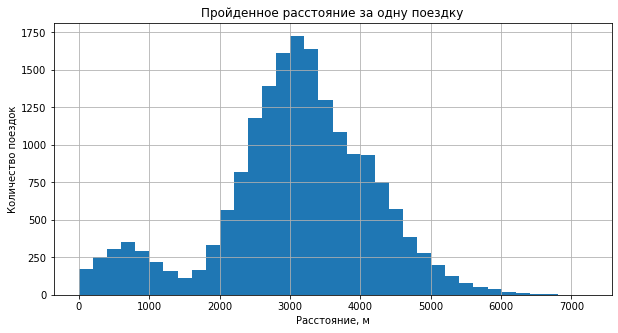

In [30]:
rides_data.hist(column='distance', bins=36, figsize=(10, 5));
plt.title('Пройденное расстояние за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

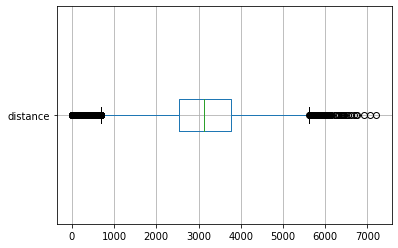

In [31]:
rides_data.boxplot(column='distance', vert=False);

Гистограмма имеет необычное распределение, на ней видно два пика. Наличие двух пиков на гистограмме может указывать на наличие двух различных групп. Эти группы могут представлять различные типы поездок или поведение пользователей. Вот некоторые возможные объяснения:

Типы поездок: Первый пик около 3000 метров может представлять "обычные" поездки, которые большинство пользователей делают в обычный день (например, поездки до работы или школы). Второй пик около 600 метров может представлять "короткие" поездки, которые пользователи делают для специфических целей (например, перемещение внутри большого торгового центра или кампуса).

Поведение пользователей: Два пика могут отражать различное поведение двух групп пользователей. Например, одна группа пользователей может предпочитать короткие поездки, в то время как другая группа может регулярно совершать более длинные поездки.



Среднее расстояние, которое проехали пользователи, составляет примерно 3070 метров. Межквартильный размах находится между 2543 и 3776 метров. Минимальное расстояние составляет менее 1 метра, в то время как максимальное расстояние составляет около 7211 метров. 

### Анализ столбца `'duration'`

Изучим данные столбца из датафрейма `rides_data`.

In [32]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

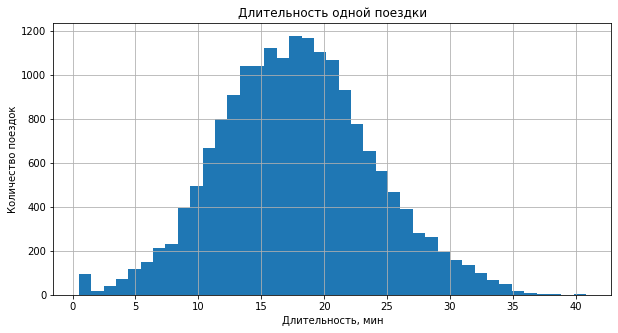

In [33]:
rides_data.hist(column='duration', bins=41, figsize=(10, 5));
plt.title('Длительность одной поездки')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.show()

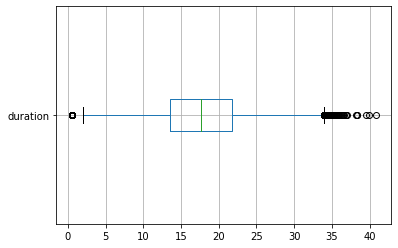

In [34]:
rides_data.boxplot(column='duration', vert=False);

Значения длительности поездки распределено нормально, но можно заметить скачок значений, которые не превышают 2 мин и отмечены как выброс. Также заметен длинный хвост из редких больших значений свыше 34 мин, которые отмечаются как аномальные. Изучим их подробнее. 

Начнем с малых значений.

In [35]:
print(rides_data['duration'][rides_data['duration'] < 2].count())
rides_data[rides_data['duration'] < 2].sort_values(by='distance').head(10)

95


,user_id,distance,duration,date,month
15132,1325,4030.308008,0.5,2021-12-22,12
17909,1524,4103.998874,0.5,2021-06-18,6
10692,1006,4106.278268,0.5,2021-10-31,10
9698,937,4169.066800,0.5,2021-12-12,12
14342,1268,4177.139336,0.5,2021-06-09,6
14417,1273,4178.876258,0.5,2021-04-30,4
6531,701,4196.445201,0.5,2021-08-31,8
10650,1003,4204.302074,0.5,2021-05-17,5
16336,1412,4247.502137,0.5,2021-11-28,11
16754,1439,4324.482439,0.5,2021-12-27,12


В таблице отобразились 95 поездок длительностью менее 2 минут, а пройденные дистанции не менее 4 км. Очевидно, такое расстояние невозможно преодолеть за такое короткое время.

В таблице видно только одно значение в столбце `'duration'`. Проверим, встречаются ли другие значения помимо 0.5 мин.

In [36]:
rides_data['duration'][rides_data['duration'] < 2].unique()

array([0.5])

Все 95 строк имеют одно и то же значение длительности поездки, они составляют 6% от общего объема данных. Вероятнее всего, некорректные значения могли возникнуть из-за сбоя при копировании, считывании или сохранении данных. 

Удалим эти строки из датафрейма.

In [37]:
rides_data = rides_data[rides_data['duration'] > 1]

Проверяем результат.

In [38]:
rides_data['duration'][rides_data['duration'] < 2].count()

0

Мы избавились от аномальных значений.

Теперь изучим данные со значениями свыше 34 минут.

In [39]:
print(rides_data['duration'][rides_data['duration'] > 34].count())
rides_data[rides_data['duration'] > 34].sort_values(by='distance').head(10)

75


,user_id,distance,duration,date,month
13883,1237,3672.447904,34.031534,2021-01-25,1
17684,1509,3728.895778,34.339432,2021-01-22,1
5065,545,3766.439469,34.598637,2021-05-28,5
1621,174,3794.401307,35.766408,2021-12-23,12
17353,1485,3807.409685,34.767689,2021-12-09,12
7448,767,3850.899177,34.004905,2021-09-15,9
3128,337,3888.423279,34.330540,2021-09-22,9
2279,243,3915.218384,36.491310,2021-12-30,12
6050,649,3931.027998,34.586168,2021-06-14,6
1455,158,3967.285849,35.803715,2021-05-09,5


Хоть эти поездки и выделяются по своей длительности, выглядят они корректно, поэтому оставим их как есть. 

Теперь взглянем на общие данные еще раз.

In [40]:
rides_data['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

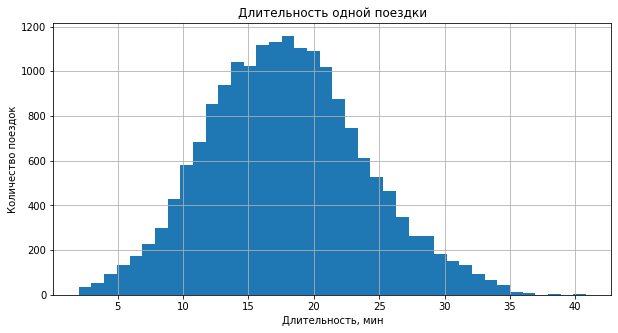

In [41]:
rides_data.hist(column='duration', bins=40, figsize=(10, 5));
plt.title('Длительность одной поездки')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.show()

Теперь гистограмма в порядке. Распределение длительности поездки выглядит равномерным. Половина поездок имеют длительность от 13 до 22 мин, что и подтверждает средняя длительность поездок в 17 мин. Самая короткая поездка заняла 2 мин, самая длинная 42 мин.

### Вывод


95 строк (6% от общего объема данных) имели аномальные значения длительности поездки, которые мы удалили. Вероятнее всего, некорректные значения могли возникнуть из-за сбоя при копировании, считывании или сохранении данных. 

В данных представлено 8 городов. Наибольшее количество пользователей обнаружено в Пятигорске - 219 пользователей (14.3%), что на 25% больше, чем в Москве, где обнаружено наименьшее число пользователей - 168 (11%). Это вызывает вопросы, поскольку Москва является крупным городом с большим количеством потенциальных пользователей.

Приложением без подписки пользуется 835 пользователей, что составляет 54.4% от всех пользователей, а с подпиской Ultra пользуется 699 пользователей, что составляет 45.6% соответственно.

Пользователей приложения без подписки больше всего лишь на 8.8%, чем пользователей с подпиской Ultra.

Среднее расстояние, которое проехали пользователи, составляет примерно 3070 метров. Половина поездок имеет длину между 2543 и 3776 метров. Минимальное расстояние составляет менее 1 метра, в то время как максимальное расстояние составляет около 7211 метров. 

Половина поездок имеют длительность от 13 до 22 мин, что и подтверждает средняя длительность поездок в 17 мин. Самая короткая поездка заняла 2 мин, самая длинная 42 мин.

## Объединение данных

### Объединение всех данных в один датафрейм

Объединим все таблицы в одну. За основу возьмем датафрейм `rides_data`,  присоединим к нему поочередно датафрейм `users_data` по общему столбцу `'user_id'` и `subscriptions_data` по общему столбцу `'subscription_type'`.

In [42]:
total_data = rides_data\
.merge(
    users_data, 
    on='user_id', 
    how='left')
total_data = total_data\
    .merge(
    subscriptions_data, 
    on='subscription_type', 
    how='left')

Проверяем результат.

In [43]:
total_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Убедимся, все ли данные были внесены, не появились ли пропуски.

In [44]:
print(f'Количество строк в таблице до объединения: {rides_data.shape[0]}')
print(f'Количество строк в таблице после объединения: {total_data.shape[0]}')

Количество строк в таблице до объединения: 17973
Количество строк в таблице после объединения: 17973


In [45]:
total_data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество строк в таблице после объединения равно количеству строк до объединения - это подтверждает, что объединение таблиц было выполнено успешно, и все данные были корректно внесены в итоговую таблицу. Пропусков в данных не обнаружено.

Теперь, когда все данные собраны в одной таблице, мы можем перейти к следующим этапам анализа данных.

### Создание отдельных датафреймов по виду подписки

Выделим отдельно данные по пользователям бесплатной подписки и подписки Ultra.

Создаем переменную `free_sub_data` с данными пользователей бесплатной подписки.

In [46]:
free_sub_data = total_data[total_data['subscription_type'] == 'free']
free_sub_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Теперь создаем переменную `ultra_sub_data` с данными пользователей подписки Ultra.

In [47]:
ultra_sub_data = total_data[total_data['subscription_type'] == 'ultra']
ultra_sub_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Убедимся, не появились ли пропуски в новых разделенных таблицах.

In [48]:
free_sub_data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [49]:
ultra_sub_data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в данных не обнаружено, разделение таблиц было выполнено корректно. 

Проверим общее количество поездок по каждому типу подписки.

In [50]:
print(
    'Количество поездок пользователей с бесплатной подпиской:',\
    len(free_sub_data))
print(
    'Количество поездок пользователей с подпиской Ultra:',\
    len(ultra_sub_data))

Количество поездок пользователей с бесплатной подпиской: 11473
Количество поездок пользователей с подпиской Ultra: 6500


Несмотря на то, что пользователей бесплатной подпиской меньше всего на 8.8%, поездок по этой подписке совершается почти в 2 раза больше (43.8%), чем по подписке Ultra.

### Визуализация поездок по типу подписки

#### Сравнение расстояния поездок по типу подписки

Сравним пройденное расстояние за одну поездку пользователей бесплатной подписки и пользователей подписки Ultra.

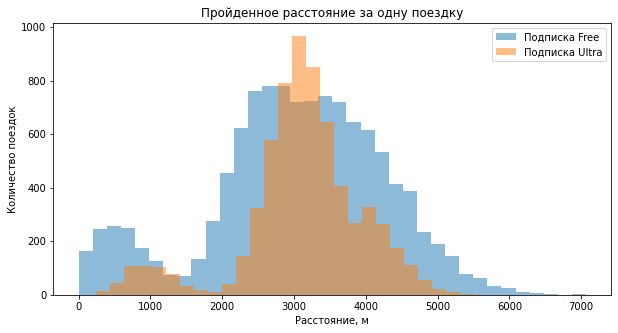

In [51]:
plt.figure(figsize=(10, 5))

plt.hist(
    free_sub_data['distance'], 
    bins=36, 
    alpha=0.5, 
    label='Подписка Free'
)
plt.hist(
    ultra_sub_data['distance'], 
    bins=28, 
    alpha=0.5, 
    label='Подписка Ultra'
)

plt.title('Пройденное расстояние за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')

plt.show()

In [52]:
free_sub_data['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

In [53]:
ultra_sub_data['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Можно заметить, что по подписке Ultra совершается заметно меньше коротких поездок до 2 км, чем по бесплатной подписке. Также по бесплатной подписке больше длинных поездок. 

Пиковое значение расстояния поездки по обеим подпискам остается примерно одинаковым - в районе 3 км. 

В среднем по бесплатной подписке пользователи преодолевают от 2.2 до 4.2 км. По подписке Ultra - от 2.6 до 3.6 км.

#### Сравнение времени поездок по типу подписки

Сравним длительность одной поездки пользователей бесплатной подписки и пользователей подписки Ultra.

Визуализируем длительность по бесплатной подписке.

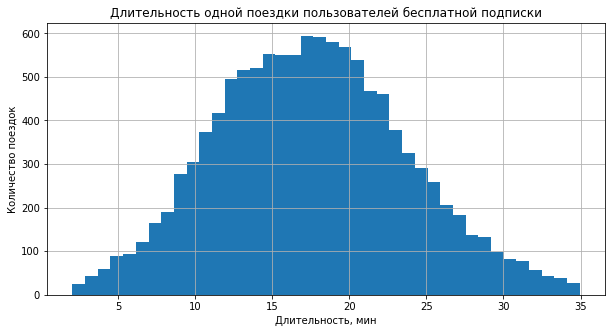

In [54]:
free_sub_data.hist(column='duration', bins=40, figsize=(10, 5));
plt.title('Длительность одной поездки пользователей бесплатной подписки')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.show()

In [55]:
free_sub_data['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

Визуализируем длительность по подписке Ultra.

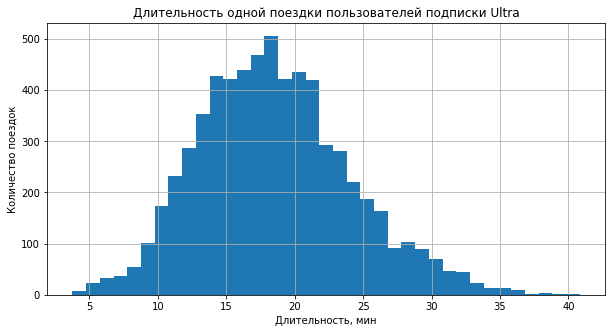

In [56]:
ultra_sub_data.hist(column='duration', bins=37, figsize=(10, 5));
plt.title('Длительность одной поездки пользователей подписки Ultra')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.show()

In [57]:
ultra_sub_data['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Графики почти идентичны друг другу, отличия минимальны. 

Среднее значение времени поездки по обеим подпискам остается примерно одинаковым - в районе 17-18 мин. 

В среднем по бесплатной подписке пользователи ездят от 13 до 22 мин. По подписке Ultra - от 14 до 22 мин.

### Вывод

Были объединены данные о пользователях, поездках и подписках в один датафрейм `total_data`. На основе нового датиафрейма мы выделили  отдельно два датафрейма по типу подписки: `free_sub_data` - пользователи бесплатной подписки, `ultra_sub_data` - пользователи подписки Ultra.

Визуализировали данные о расстоянии и времени поездок для пользователей обеих категорий:

- Пиковые значения поездок по обеим подпискам остается примерно одинаковым - в районе 17-18 мин по времени и 3 км по дистанции. 

- В среднем по бесплатной подписке пользователи ездят от 13 до 22 мин и преодолевают от 2.2 до 4.2 км. 

- По подписке Ultra - ездят от 14 до 22 мин и преодолевают от 2.6 до 3.6 км.

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках

Перед созданием датафрейма сначала округлим до следующего целого числа продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости поездки.

In [58]:
total_data['duration'] = np.ceil(total_data['duration'])

Теперь создадим сводную таблицу на основе датафрейма с объединенными данными `'total_data'` с указанием суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.

In [59]:
rides_pivot_table = total_data\
    .pivot_table(
        index=['month', 'user_id', 'subscription_type', 'city'], 
        values=['distance', 'duration'], 
        aggfunc={'distance': [len, sum], 'duration': sum})

Объединим "двухэтажные" наименования столбцов в одну строку. 

In [60]:
rides_pivot_table.columns = rides_pivot_table.columns.map('_'.join)

Сбросим индексы.

In [61]:
rides_pivot_table.reset_index(inplace=True)

Переименуем столбцы.

In [62]:
rides_pivot_table = rides_pivot_table\
.rename(columns={
    'distance_len': 'rides_amount', 
    'distance_sum': 'total_distance',
    'duration_sum': 'total_duration'
})

Ещё раз округлим до следующего целого числа полную продолжительность поездкок за месяц.

In [63]:
rides_pivot_table['total_duration'] = \
np.ceil(rides_pivot_table['total_duration'])

Округляем значения в столбце `'total_distance'` и меняем тип данных в столбцах `'total_duration'` и `'rides_amount'`с `float` на `int` для облегчения восприятия информации.

In [64]:
rides_pivot_table['total_distance'] = \
rides_pivot_table['total_distance'].round(2)

rides_pivot_table['total_duration'] = \
rides_pivot_table['total_duration'].astype('int')

rides_pivot_table['rides_amount'] = \
rides_pivot_table['rides_amount'].astype('int')

Выведем таблицу на экран. 

Описание данных:
- `'rides_amount'` — количество поездок, совершенных каждым пользователем за каждый месяц
- `'total_distance'` — суммарное расстояние поездок каждого пользователя за каждый месяц
- `'total_duration'` — суммарное время поездок каждого пользователя за каждый месяц

In [65]:
rides_pivot_table.head(10)

,month,user_id,subscription_type,city,rides_amount,total_distance,total_duration
0,1,1,ultra,Тюмень,2,7027.51,42
1,1,3,ultra,Москва,1,3061.78,13
2,1,5,ultra,Омск,1,3914.65,13
3,1,7,ultra,Омск,2,6478.08,28
4,1,12,ultra,Тюмень,1,3577.15,33
5,1,13,ultra,Краснодар,2,6687.99,42
6,1,14,ultra,Пятигорск,2,7699.64,35
7,1,15,ultra,Тюмень,1,4187.62,39
8,1,20,ultra,Омск,1,3516.72,29
9,1,22,ultra,Пятигорск,1,3058.69,13


### Подсчёт помесячной выручки за каждого пользователя

Создадим функцию `calculate_income`, при помощи которой мы сможем посчитать помесячную выручку, которую принёс каждый пользователь.

In [66]:
def calculate_income(row):
    subscription_row = \
    subscriptions_data[subscriptions_data['subscription_type'] == \
                       row['subscription_type']]
    
    income = \
    subscription_row['start_ride_price'].values[0] * \
    row['rides_amount'] + \
    subscription_row['minute_price'].values[0] * \
    row['total_duration'] + \
    subscription_row['subscription_fee'].values[0]
    
    return income

Теперь добавим к сводной таблице новый столбец `'income'` и применим функцию `calculate_income`.

In [67]:
rides_pivot_table['income'] = \
rides_pivot_table.apply(calculate_income, axis=1)

Проверяем результат.

In [68]:
rides_pivot_table.head()

,month,user_id,subscription_type,city,rides_amount,total_distance,total_duration,income
0,1,1,ultra,Тюмень,2,7027.51,42,451
1,1,3,ultra,Москва,1,3061.78,13,277
2,1,5,ultra,Омск,1,3914.65,13,277
3,1,7,ultra,Омск,2,6478.08,28,367
4,1,12,ultra,Тюмень,1,3577.15,33,397


Выясним общую годовую выручку, а также годовую выручку в зависимости от типа подписки.

In [69]:
print(
    f"Полная выручка за 2021 год составляет "
    f"{rides_pivot_table['income'].sum()} рублей."
)

free_income = rides_pivot_table['income'][
    rides_pivot_table['subscription_type'] == 'free'
].sum()
total_income = rides_pivot_table['income'].sum()
free_percentage = (free_income / total_income * 100).round(2)

print(
    f"Полная выручка за пользователей бесплатной подписки составляет "
    f"{free_income} рублей ({free_percentage}%)."
)

ultra_income = rides_pivot_table['income'][
    rides_pivot_table['subscription_type'] == 'ultra'
].sum()
ultra_percentage = (ultra_income / total_income * 100).round(2)

print(
    f"Полная выручка за пользователей подписки Ultra составляет "
    f"{ultra_income} рублей ({ultra_percentage}%)."
)

Полная выручка за 2021 год составляет 3873131 рублей.
Полная выручка за пользователей бесплатной подписки составляет 2228594 рублей (57.54%).
Полная выручка за пользователей подписки Ultra составляет 1644537 рублей (42.46%).


Всего за год компания заработала 3 901 049 рублей, и больше половины этой суммы (57.84%) принесли пользователи бесплатной подписки.

Изучим помесячную выручку по каждому типу подписки.

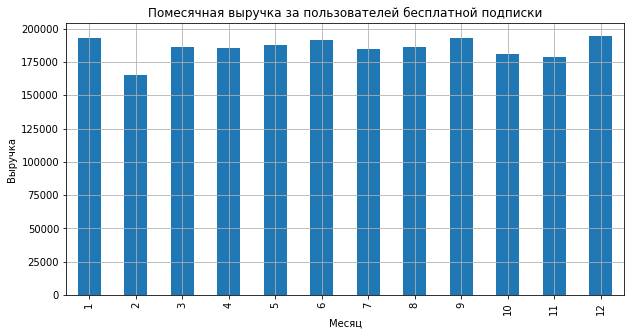

In [70]:
rides_pivot_table[rides_pivot_table['subscription_type'] == 'free']\
    .groupby('month')['income']\
    .sum()\
    .plot(kind='bar', figsize=(10, 5), grid=True);
plt.title('Помесячная выручка за пользователей бесплатной подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

Среди пользователей бесплатной подписки самые прибыльные месяцы оказались январь и декабрь, наименее прибыльный - февраль.

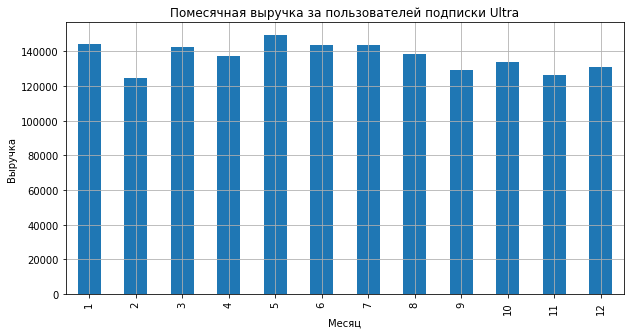

In [71]:
rides_pivot_table[rides_pivot_table['subscription_type'] == 'ultra']\
    .groupby('month')['income']\
    .sum()\
    .plot(kind='bar', figsize=(10, 5), grid=True);
plt.title('Помесячная выручка за пользователей подписки Ultra')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

Здесь мы видим, что среди пользователей подписки Ultra наиболее прибыльными вышли январь и май, но наименее прибыльным тмкже остается февраль.

In [72]:
rides_pivot_table

,month,user_id,subscription_type,city,rides_amount,total_distance,total_duration,income
0,1,1,ultra,Тюмень,2,7027.51,42,451
1,1,3,ultra,Москва,1,3061.78,13,277
2,1,5,ultra,Омск,1,3914.65,13,277
3,1,7,ultra,Омск,2,6478.08,28,367
4,1,12,ultra,Тюмень,1,3577.15,33,397
...,...,...,...,...,...,...,...,...
11295,12,1525,free,Омск,1,4597.85,34,322
11296,12,1526,free,Омск,1,3644.12,23,234
11297,12,1528,free,Пятигорск,1,3998.57,11,138
11298,12,1532,free,Тюмень,2,6111.89,42,436


### Вывод

Создали сводную таблицу `rides_pivot_table` на основе датафрейма с объединенными данными `total_data` с указанием суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц. Также высчитали помесячную выручку, которую принёс каждый пользователь.

Всего за год компания заработала 3 901 049 рублей, из которых 57.84% приходится на пользователей бесплатной подписки и 42.16% на пользователей подписки Ultra соответственно.

Пользователи бесплатной подписки больше всего ездят в январе и декабре, а пользователи подписки Ultra - в январе и мае. По обоим  видам подписки самым неприбыльным месяцем вышел февраль.

Выручка января опережает выручку за май, а зимние месяцы почти не отличаются от летних - это кажется необычным, учитывая, что обычно активность аренды самокатов увеличивается в теплые месяцы. Можно предположить, что в декабре и январе могли проводиться какие-то маркетинговые акции или события, которые привлекают больше пользователей. Также есть вероятность, что в данных есть неочевидные ошибки. Это может произойти из-за проблем с записью данных, ошибок при вводе данных или неправильной обработки данных.

## Проверка гипотез

### Время, потраченное на поездки пользователями с подпиской Ultra

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Проведем t-тест для двух независимых выборок.

**Гипотеза**: Пользователи с подпиской Ultra тратят больше времени на поездки, чем пользователи с бесплатной подпиской.

$H_0$: Время поездки пользователей на подписке Ultra **равно** времени поездки пользователей с бесплатной подпиской.

$H_1$: Время поездки пользователей на подписке Ultra **больше** времени поездки пользователей с бесплатной подпиской.

Для проверки этой гипотезы мы будем использовать исходные данные о продолжительности каждой поездки из датафреймов `ultra_sub_data` и `free_sub_data`.

Уровень статистической значимости — 5%.

In [73]:
ultra = ultra_sub_data['duration']
free = free_sub_data['duration']

alpha = 0.05

results = st.ttest_ind(
    ultra, 
    free, 
    alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


**Вывод**

На основе проведенного t-теста, p-значение которого близко к нулю (менее 0.01%), мы отвергаем нулевую гипотезу о том, что время поездки пользователей на подписке Ultra равно времени поездки пользователей с бесплатной подпиской. Это указывает на то, что время поездки пользователей на подписке Ultra, скорее всего, больше времени поездки пользователей с бесплатной подпиской. 

Это может быть выгодно для бизнеса, поскольку пользователи, проводящие больше времени в поездках, могут быть более вовлечены и, следовательно, могут приносить больше дохода в долгосрочной перспективе.

Однако стоит помнить, что эти данные не подтверждают исходную гипотезу, а лишь не противоречат ей.

### Среднее расстояние, пройденное за одну поездку пользователями с подпиской Ultra

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проведем одновыборочный t-тест.

**Гипотеза**: Среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra не превышает 3130 метров.

$H_0$: Среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra **равно** 3130 м.

$H_1$: Среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra **больше** 3130 м.

Для проверки этой гипотезы мы будем использовать исходные данные о рассотянии поездкок из датафрейма `ultra_sub_data`.

Уровень статистической значимости — 5%.

In [74]:
distance_ultra_sub = ultra_sub_data['distance']

interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    distance_ultra_sub, 
    interested_value, 
    alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод**

На основе проведенного одновыборочного t-теста, p-значение которого равно 9.19%, что превышает уровень статистической значимости, мы не можем отвергнуть нулевую гипотезу о том, что среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra равно 3130 метров. Это указывает на то, что среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra, скорее всего, не превышает 3130 метров. 

Если среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra не превышает 3130 метров, это может быть выгодно для бизнеса, поскольку это может уменьшить износ самокатов и, следовательно, снизить затраты на обслуживание и замену оборудования.

Однако стоит помнить, что эти данные не подтверждают исходную гипотезу, а лишь не противоречат ей. Для более уверенных выводов необходимо провести дополнительные исследования.

### Помесячная выручка по месяцам от пользователей по типу подписки

Будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?


Проведем t-тест для двух независимых выборок.

**Гипотеза**: Помесячная выручка от пользователей подписки Ultra больше, чем от пользователей с бесплатной подпиской.

$H_0$: Помесячная выручка от пользователей подписки Ultra **равна** выручке от пользователей с бесплатной подпиской.

$H_1$: Помесячная выручка от пользователей подписки Ultra **больше** выручке от пользователей с бесплатной подпиской.

Для проверки этой гипотезы мы будем использовать данные о выручке с каждого пользователя за месяц из датафрейма `rides_pivot_table`.

Уровень статистической значимости — 5%.

In [75]:
ultra = rides_pivot_table\
    .loc[rides_pivot_table['subscription_type'] == 'ultra', 'income']
free = rides_pivot_table\
    .loc[rides_pivot_table['subscription_type'] == 'free', 'income']

alpha = 0.05

results = st.ttest_ind(
    ultra, 
    free, 
    alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


**Вывод**

На основе проведенного t-теста, p-значение которого близко к нулю (менее 0.01%), мы отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей подписки Ultra равна выручке от пользователей с бесплатной подпиской. Это указывает на то, что помесячная выручка от пользователей подписки Ultra, скорее всего, больше выручки от пользователей с бесплатной подпиской. Это может быть выгодно для бизнеса, поскольку большая выручка напрямую влияет на прибыльность.

Однако стоит помнить, что эти данные не подтверждают исходную гипотезу, а лишь не противоречат ей. 

### Тест для проверки гипотезы о снижении количества обращений в техподдержку после обновления сервера

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест необходим для проверки этой гипотезы?

**Ответ:**
Тест для гипотезы о равенстве средних для зависимых (парных) выборок. Чтобы проверить гипотезу в Python, нужно использовать метод `scipy.stats.ttest_rel()`. Мы будем проверять одностороннюю гипотезу, так как нас интересует только снижение количества обращений в техподдержку. 

Гипотезы в данном случае были бы сформулированы так:

$H_0$: Количество обращений в техподдержку после обновления сервера **не меньше** количеству обращений в техподдержку до обновления.

$H_1$: Количество обращений в техподдержку после обновления сервера **меньше** количеству обращений в техподдержку до обновления.

### Вывод

Мы проверили гипотезы и получили следующие результаты:

- Мы отвергаем нулевую гипотезу о том, что время поездки пользователей на подписке Ultra равно времени поездки пользователей с бесплатной подпиской. Время поездки пользователей на подписке Ultra, скорее всего, больше времени поездки пользователей с бесплатной подпиской.

- Мы не можем отвергнуть нулевую гипотезу о том, что среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra равно 3130 метров. Среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra, скорее всего, не превышает 3130 метров.

- Мы отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей подписки Ultra равна выручке от пользователей с бесплатной подпиской. Помесячная выручка от пользователей подписки Ultra, скорее всего, больше выручки от пользователей с бесплатной подпиской.

Также для проверки гипотезы о снижении количества обращений в техподдержку после обновления сервера мы бы использовали тест для односторонней гипотезы о равенстве средних для зависимых (парных) выборок. 

## Распределения

### Определение минимального количества рассылаемых промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. 

Для решения этой задачи мы можем использовать биномиальное распределение. Нам нужно найти такое количество промокодов `n`, при котором вероятность того, что количество продлений подписки будет меньше или равно 100, составляет примерно 5% (это наш уровень статистической значимости).

Найдем значение `n` спомощью цикла и метода `cdf()`.

In [76]:
p1 = 0.1
alpha = 0.05
target_successes = 100
desired_probability = 0.95

# Подбираем значение n
for n in range(target_successes, 2000):
    if binom.cdf(target_successes, n, p1) < alpha:
        break

min_n = n 
print(f"Минимальное количество промокодов, которое нужно разослать: {min_n}")

Минимальное количество промокодов, которое нужно разослать: 1172


Мы выяснили необходимое количество промокодов, которое нужно разослать, чтобы получить кумулятивную вероятность не выполнить план в 5%.

Теперь построим график зависимости вероятности продления.

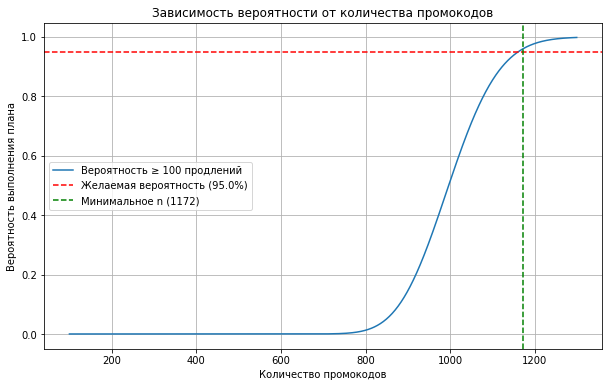

In [77]:
# Построение графика
n_values = range(target_successes, 1300)
probabilities = [
    1 - binom.cdf(target_successes - 1, n, p1) 
    for n in n_values
]

plt.figure(figsize=(10, 6))
plt.plot(
    n_values, 
    probabilities, 
    label='Вероятность ≥ 100 продлений'
)
plt.axhline(
    y=desired_probability, 
    color='r', 
    linestyle='--', 
    label=f'Желаемая вероятность ({desired_probability * 100}%)'
)
plt.axvline(
    x=min_n, 
    color='g', 
    linestyle='--', 
    label=f'Минимальное n ({min_n})'
)
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность выполнения плана')
plt.title('Зависимость вероятности от количества промокодов')
plt.legend()
plt.grid(True)
plt.show()

На графике мы видим, что вероятность выполнения плана начинает расти после 800, а достигает 100% вероятности в районе 1250 промокодов. 1172 промокода показывают вероятность в 95% выполнить план для отдела маркетинга.

Можно сделать вывод, что нужно разослать 1172 промокодов, чтобы вероятность не выполнить план была примерно 5%.

### Рассылка клиентам push-уведомлений в мобильном приложении

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. Необходимо оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

В этом случае мы можем использовать нормальную аппроксимацию биномиального распределения, так как количество уведомлений достаточно велико.

In [78]:
n = 1000000
p = 0.4
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x = 399500

# Вычисление вероятности
p2 = norm.cdf(x, mu, sigma)

print(f"Вероятность, что уведомление откроют "
      f"не более 399,5 тыс. пользователей: {p2:.2%}")

Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


Мы выяснили кумулятивную вероятность случая, что уведомление откроют не более 399,5 тыс. пользователей.

Теперь построим график зависимости вероятности.

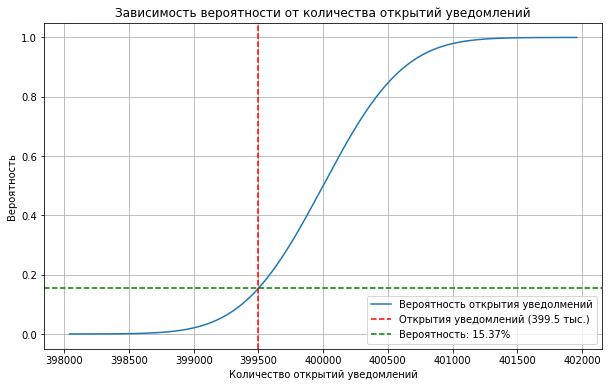

In [79]:
# Построение графика
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
probabilities = norm.cdf(x_values, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(
    x_values, 
    probabilities, 
    label='Вероятность открытия уведолмений'
)
plt.axvline(
    x=x, 
    color='r', 
    linestyle='--', 
    label=f'Открытия уведомлений ({x/1000} тыс.)'
)
plt.axhline(
    y=p2, 
    color='g', 
    linestyle='--', 
    label=f'Вероятность: {p2:.2%}'
)
plt.xlabel('Количество открытий уведомлений')
plt.ylabel('Вероятность')
plt.title('Зависимость вероятности от количества открытий уведомлений')
plt.legend()
plt.grid(True)
plt.show()

Красной чертой отмечено оцениваемое количество пользователей, которые должны открыть уведомление. Область левее красной линии занимает 15.37% от общей площади графика.

Можно сделать вывод, что вероятность открытия уведомления не более 399,5 тыс. пользователей равна 15.37%.

### Вывод

В рамках акции для продления подписки как минимум 100 клиентов отделу маркетинга нужно разослать 1172 промокодов, чтобы вероятность не выполнить план была примерно 5%.

При рассылке клиентам отделом маркетинга 1 млн push-уведомлений вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.

## Общий вывод

Были проанализированы данные и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти. Полученные результаты могут быть использованы для дальнейшего улучшения сервиса. В ходе проведенного анализа данных были получены следующие результаты:

В данных не были обнаружены пропущенные значения. Была проведена работа по удалению 31 дубликата в датафрейме `users_data` и 95 аномальных значений в столбце `'duration'` датафрейма `rides_data`. Также в столбце `'date'` датафрейма `rides_data` изменили тип данных на `'datetime'`.

После проведения анализа данных мы сделали следующие выводы:

- В данных представлено 8 городов. Наибольшее количество пользователей обнаружено в Пятигорске - 219 пользователей (14.3%), что на 25% больше, чем в Москве, где обнаружено наименьшее число пользователей - 168 (11%).

- Приложением без подписки пользуется 835 пользователей, что составляет 54.4% от всех пользователей, а с подпиской Ultra пользуется 699 пользователей, что составляет 45.6% соответственно.

- Пользователей приложения без подписки больше всего лишь на 8.8%, чем пользователей с подпиской Ultra.

- Среднее расстояние, которое проехали пользователи, составляет примерно 3070 метров. Половина поездок имеет длину между 2543 и 3776 метров. Минимальное расстояние составляет менее 1 метра, в то время как максимальное расстояние составляет около 7211 метров. 

- Половина поездок имеют длительность от 13 до 22 мин, что и подтверждает средняя длительность поездок в 17 мин. Самая короткая поездка заняла 2 мин, самая длинная 42 мин.

После группировки данных мы выяснили, что:

- Пользователи бесплатной подписки совершают на 43.8% поездок больше, чем по подписке Ultra.
 
- Пиковые значения поездок по обеим подпискам остается примерно одинаковым - в районе 17-18 мин по времени и 3 км по дистанции. 

- В среднем по бесплатной подписке пользователи ездят от 13 до 22 мин и преодолевают от 2.2 до 4.2 км. 

- По подписке Ultra - ездят от 14 до 22 мин и преодолевают от 2.6 до 3.6 км.

- Всего за год компания заработала 3 901 049 рублей, из которых 57.84% приходится на пользователей бесплатной подписки и 42.16% на пользователей подписки Ultra соответственно.

- Пользователи бесплатной подписки больше всего ездят в январе и декабре, а пользователи подписки Ultra - в январе и мае. По обоим видам подписки самым неприбыльным месяцем вышел февраль.

Мы проверили гипотезы и получили следующие результаты:

- Мы отвергаем нулевую гипотезу о том, что время поездки пользователей на подписке Ultra равно времени поездки пользователей с бесплатной подпиской. Время поездки пользователей на подписке Ultra, скорее всего, больше времени поездки пользователей с бесплатной подпиской.

- Мы не можем отвергнуть нулевую гипотезу о том, что среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra равно 3130 метров. Среднее пройденное расстояние за одну поездку пользователя с подпиской Ultra, скорее всего, не превышает 3130 метров.

- Мы отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей подписки Ultra равна выручке от пользователей с бесплатной подпиской. Помесячная выручка от пользователей подписки Ultra, скорее всего, больше выручки от пользователей с бесплатной подпиской.

Также для проверки гипотезы о снижении количества обращений в техподдержку после обновления сервера мы бы использовали тест для односторонней гипотезы о равенстве средних для зависимых (парных) выборок. 

В задачах по распределению мы сделали следующие выводы:

- В рамках акции для продления подписки как минимум 100 клиентов отделу маркетинга нужно разослать 1172 промокодов, чтобы вероятность не выполнить план была примерно 5%.

- При рассылке клиентам отделом маркетинга 1 млн push-уведомлений вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.

На основе проведенного анализа, мы можем дать следующие рекомендации:

- Учитывая, что в Москве меньше пользователей, чем ожидалось, стоит провести дополнительное исследование для выяснения причин. Возможно, стоит увеличить маркетинговые усилия в Москве или улучшить инфраструктуру для самокатов.

- Учитывая, что пользователи подписки Ultra в среднем проезжают больше расстояния и тратят больше времени на поездки, можно рассмотреть возможность оптимизации этой подписки, чтобы сделать ее более привлекательной для пользователей. Или, учитывая, что пользователи без подписки совершают больше поездок, возможно, стоит рассмотреть оптимизацию условий подписки или предложить специальные акции для этих пользователей.

- Учитывая различия в поведении пользователей (например, длительность и расстояние поездок), можно рассмотреть возможность предложения различных тарифов или услуг, которые лучше соответствуют потребностям разных групп пользователей.